<a href="https://colab.research.google.com/github/virb30/data_science/blob/master/notebooks/Manipula%C3%A7%C3%A3o_imagens_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipula√ß√£o de Imagens com OpenCV

Este notebook tem como objetivo demonstrar algumas t√©cnicas de manipula√ß√£o e cria√ß√£o de imagens - redimensionar, cortar, rotacionar, transladar, aplicar filtros e m√°scaras - utilizando Python e a biblioteca OpenCV.

O OpenCV √© uma biblioteca *open-source* de vis√£o computacional, multiplataforma e otimizada para aplica√ß√µes em tempo real.

In [5]:
# importar as bibliotecas
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow

### Ler um arquivo de imagem

Primeiro carregamos uma imagem e exibimos para garantir que foi carregada corretamente.



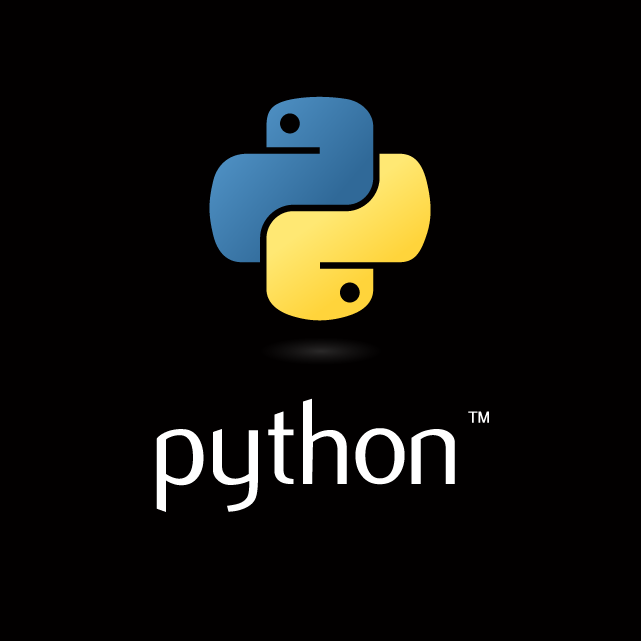

In [6]:
# ler um arquivo
image = cv2.imread("/content/python.png")
cv2_imshow(image)

Utilizando o comando `shape` podemos visualizar suas dimens√µes no formato `(a, l, c)` onde:
- `a`: altura da imagem (em pixels)
- `l`: largura da imagem (em pixels)
- `c`: quantidade de canais (se omitido significa 1 canal - escala de cinza)

In [7]:
image.shape

(641, 641, 3)

### Criar uma imagem

Tamb√©m √© poss√≠vel criarmos imagens do zero. Se lembrarmos uma imagem √© como uma matriz de n√∫meros - no intervalo de 0 a 255. Podemos ent√£o criar um array com o Numpy que poder√° ser representado como uma imagem.

No exemplo abaixo criamos uma imagem de 81x81 completamente preta utilizando o comando `np.zeros`. Como 0 significa "aus√™ncia de cor" todos os pixels s√£o representados com a cor preta.

Como segundo par√¢metro da fun√ß√£o informamos ao numpy que queremos criar todos os elementos do array com o tipo `uint8` para atingirmos o resultado esperado.

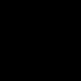

In [8]:
# criar uma imagem
scratch_image = np.zeros((81,81), dtype=np.uint8)
cv2_imshow(scratch_image)

### Desenhar por cima da imagem

Assim como conseguimos criar imagens do zero, podemos utilizar o recurso de ***slicing*** dos arrays para "pintar" intervalos de pixels de outras cores.

No exemplo iremos alterar o valor de alguns pixels para 255, que resultara em se√ß√µes em brancas na imagem.

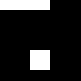

In [9]:
# desenhar
scratch_image[0:10, 0:50] = 255
scratch_image[50:70, 30:50] = 255

cv2_imshow(scratch_image)

In [10]:
# ver dimens√µes
scratch_image.shape

(81, 81)

### Converter uma imagem para BGR

Por padr√£o o OpenCV utiliza a escala RGB ao contr√°rio, por isso chamaos de BGR. A imagem que criamos anteriormente possui apenas um canal, conforme podemos ver no resultado do comando `scratch_image.shape`.

Para fazer convers√µes, precisamos buscar dentro do OpenCV o esquema de cores que queremos converter.

Como exemplo, vamos converter nossa imagem o formato BGR. Podemos ver que o `shape` da nossa imagem passou de `(81,81)` para `(81,81,3)`

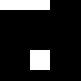

(81, 81, 3)


In [11]:
# converter imagem de escala de cinza (1 canal) para BGR (3 canais)
scratch_image_bgr = cv2.cvtColor(scratch_image, cv2.COLOR_GRAY2BGR)
cv2_imshow(scratch_image_bgr)
print(scratch_image_bgr.shape)

### Converter o formato da foto (PNG <-> JPG)

Al√©m de converter o esquema de cores da imagem, podemos alterar seu formato, no OpenCV √© t√£o simples quanto renomear o arquivo, como ele reconhece diversos formatos, precisamos apenas utilizar o comando `imwrite` para salvar um arquivo com seu novo formato.

In [12]:
cv2.imwrite('foto_nova.jpg', image)

True

### Carregar imagem em grayscale

Por padr√£o, o OpenCV carrega imagens utilizando os 3 canais (BGR), mesmo que o arquivo tenha sido criado e salvo com um √∫nico canal (escala de cinza).

No entanto conseguimos abrir a imagem em outros formatos de cor informando no segundo par√¢metro no m√©todo `imread`.

In [13]:
# carregar imagem grayscale com 1 √∫nico canal
teste = cv2.imread("/content/python.png", cv2.IMREAD_GRAYSCALE)
print(teste.shape)

(641, 641)


### Modos do `cv2.imread`

- cv2.IMREAD_COLOR
  - 3 canais de cores (BGR), com valores de 8-bit (0-255)
- cv2.IMREAD_GRAYSCALE
  - escala de cinza de 8-bit (1 canal)
- cv2.IMREAD_ANYCOLOR
  - Dependente do metadado da imagem. Pode retornar 8-bit por canal BGR ou 8-bit grayscale
- cv2.IMREAD_UNCHANGED
  - L√™ todos os dados da imagem, incluindo o canal alpha, se existir
- cv2.IMREAD_REDUCED_GRAYSCALE_2 / 4 / 8
  - Carrega uma imagem na metade da resolu√ß√£o original, em grayscale
- cv2.IMREAD_REDUCED_COLOR_2 / 4 / 8
  - Carrega uma imagem na metade da resolu√ß√£o original, em BGR.


### Separando (*splitting*) e Agrupando (*merging*) canais

Tamb√©m conseguimos separar e unir os canais de uma imagem. Essa funcionalidade √© √∫til quando precisamos manipular, ou aplicar filtros em apenas um canal da imagem.

In [14]:
# split channels
(b, g, r) = cv2.split(image)

In [15]:
# merge channels
image_copy = cv2.merge((b,g,r))

### Transforma√ß√µes Geom√©tricas

Em vis√£o computaciona, as vezes, precisamos redimensionar e cortar imagens. Podemos essas e outras transforma√ß√µes com alguns comandos:


#### Escala

A primeira transforma√ß√£o ser√° a escala. Com ela conseguimos aumentar ou diminuir alguma ou ambas as dimens√µes da imagem.

Conseguimos realizar essa manipula√ß√£o tanto com valores absolutos quanto com valores relativos.

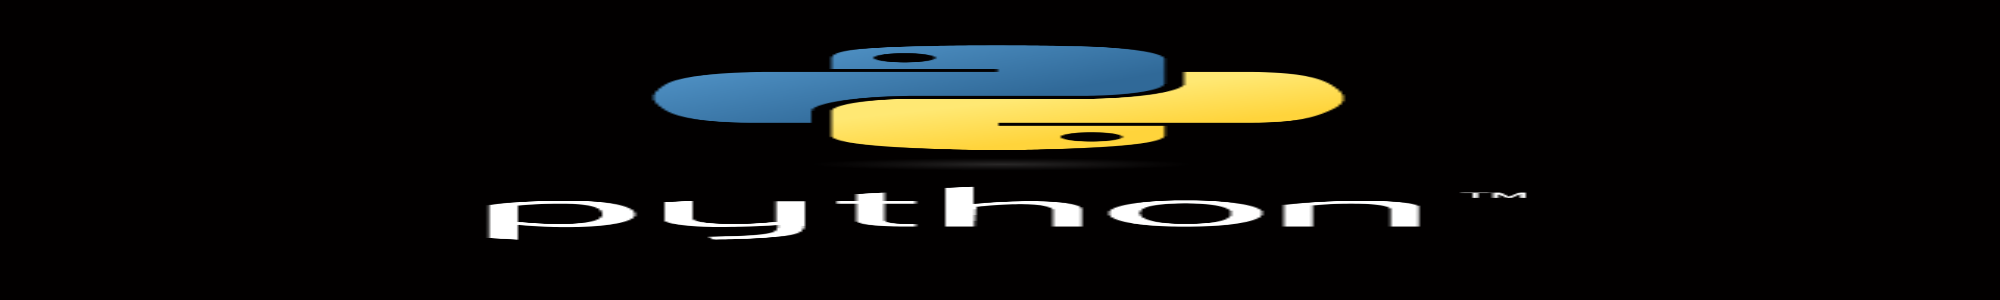

In [16]:
# valores absolutos
resized_image = cv2.resize(image, (2000, 300), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_image)

Tamb√©m conseguimos reduzi-la mantendo suas propor√ß√µes

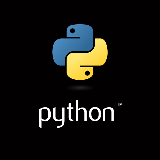

In [17]:
# ratio
dst_image = cv2.resize(image, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_CUBIC)
cv2_imshow(dst_image)

Nesse notebook, n√£o entraremos em detalhes sobre interpola√ß√£o, mais informa√ß√µes podem ser obtidas nesse <a href="https://www.cambridgeincolour.com/tutorials/image-interpolation.htm">link</a>.

Como dica geral podemos utilizar:

* **Interpola√ß√£o**
  * Aumentar a imagem
    * Geralmente, a melhor abordagem √© `cv2.INTER_CUBIC` ou `cv2.INTER_LINEAR`
  * Diminuir a imagem
    * Geralmente, a melhor abordagem √© user `cv2.INTER_LINEAR`

**B√îNUS:** Carregar imagem Reduzida

Caso necess√°rio conseguimos j√° carregar uma imagem em tamanho reduzido com fatores redu√ß√£o de 2, 4 ou 8. Basta informar no segundo par√¢metro da fun√ß√£o `imread`

(320, 320, 3)


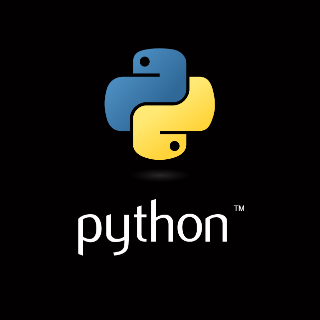

In [36]:
reduced_image = cv2.imread('/content/python.png', cv2.IMREAD_REDUCED_COLOR_2)
print(reduced_image.shape)
cv2_imshow(reduced_image)

#### Transla√ß√£o


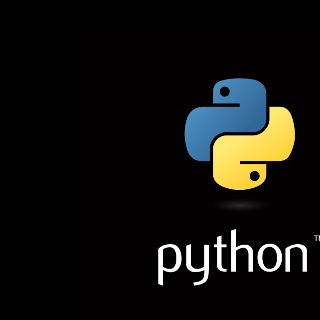

In [37]:
height, width = reduced_image.shape[:2]

M = np.float32([[1, 0, 80],
                [0, 1, 30]])

translated_image = cv2.warpAffine(reduced_image, M, (width, height))
cv2_imshow(translated_image)

#### Rota√ß√£o

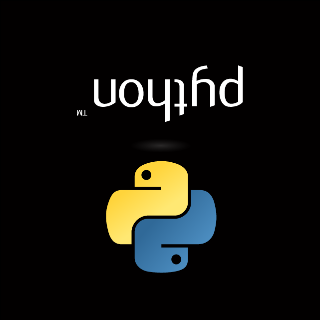

In [38]:
# Rota√ß√£o
M = cv2.getRotationMatrix2D((width/2.0, height/2.0), 180, 1)
rotated_image = cv2.warpAffine(reduced_image, M, (width, height))
cv2_imshow(rotated_image)

#### Cortar (Crop) imagem

Para cortar uma imagem, utilizamos a mesma t√©cnica de *slicing* citada anteriormente

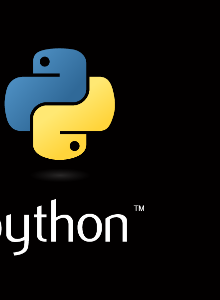

In [39]:
cropped_image = reduced_image[0:300, 100:400, :]
cv2_imshow(cropped_image)

### Filtro e Opera√ß√µes Aritm√©ticas

O filtro na verdade √© uma pequena matriz que usamos para deixar a imagem mais n√≠tida ou borrada. Para fazer isso, precisamos fazer uma opera√ß√£o de convolu√ß√£o.

Por exemplo, temos uma matriz de 6x6 pixels que repesenta nossa imagem. O pr√≥ximo passo √© fazer uma opera√ß√£o de convolu√ß√£o com filtro 3x3. O produto final desse processo de convolu√ß√£o ser√° uma matriz 4x4. N√≥s calculamos os elementos da matriz inicial (imagem) e pegamos o produto de cada elemento correspondente e os juntamos, como voc√™ pode ver abaixo.

<p align="center"><img src="http://media5.datahacker.rs/2018/10/multiplication_obojeno_new-1024x370.png" width="60%"></p>

<p align="center"><img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif" width="30%"></p>

Ap√≥s avaliar a e express√£o acima n√≥s obtemos o resultado de -5. Esse ser√° o valor do pixel naquela posi√ß√£o na nossa imagem com o filtro aplicado. O filtro √©, ent√£o, aplicado ao longo da imagem, criando a imagem pronta.

Um filtro sempre ser√° uma matriz com a mesma altura e largura (3√ó3, 5√ó5, 9√ó9). Como precisamos de um pixel no centro da matriz, sempre utilizamos n√∫meros √≠mpares.

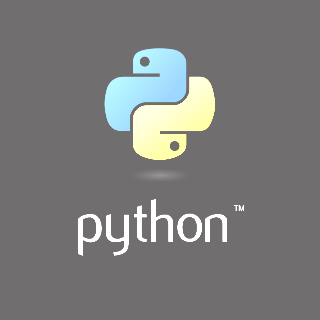

In [40]:
# utilizando o ones do numpy para criar o filtro
filter_1 = np.ones(reduced_image.shape, dtype=np.uint8) * 110
# clarear
sum = cv2.add(reduced_image, filter_1)
cv2_imshow(sum)

Nesse filtro aumentamos o brilho da imagem ao aumentar o valor de todos os pixels em 110.

Para escurecer, utilizamos a opera√ß√£o contr√°ria.

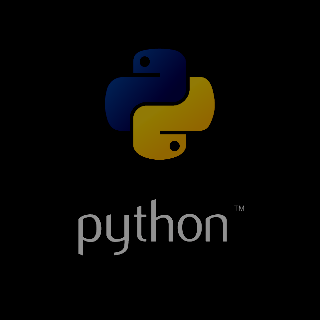

In [41]:
# para escurecer
sub = cv2.subtract(reduced_image, filter_1)
cv2_imshow(sub)

#### Blurring
Nas opera√ß√µes anteriores, tratamos apenas de um canal, no entanto, quando lidamos com imagens, √© comum utilizarmos o padr√£o **RGB**. Por isso, precisamos de outra forma de lidar com essas imagens.

O filtro de blurring pode ser usado, entre outras, para: detectar bordas, reduzir ru√≠do, omitir alguma informa√ß√£o

Quando pensamos em canais como sendo uma "vis√£o" da imagem como um todo, dando √™nfase ou escondendo determinadas partes de acordo com as caracter√≠sticas de cada canal.

<p align="center"><img src="https://miro.medium.com/max/1000/1*k8P28Ayl-5hOqIMSv-qosw.jpeg" width="70%"></p>

Por isso, uma distin√ß√£o de termos se faz chave aqui: quando falamos de 1 canal, os termos filtro e kernel s√£o praticamente intercambi√°veis, mas em geral, quando falamos de mais canais, eles s√£o bem diferentes. 

Cada filtro, na verdade, √© uma cole√ß√£o de kernels, havendo um kernel para cada canal de input para a camada, e cada kernel sendo √∫nico. Cada filtro em uma camada convolucional produz um e apenas um canal de output, e eles o fazem assim:

<p align="center"><img src="https://miro.medium.com/max/1000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="70%"></p>

Cada um dos kernels do filtro "anda" por cima de seu respectivo canal de input, produzindo uma vers√£o processada de cada um. √â importante lembrar que alguns kernels podem ter pesos mais fortes que outros, o que resultaria em √™nfases em determinados canais, ou um canal ser mais sens√≠vel a mudan√ßas que outros.

<p align="center"><img src="https://miro.medium.com/max/1000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="70%"></p>

Ent√£o, cada uma das vers√µes processadas por cada canal s√£o somadas, formando um canal √∫nico. Os kernels de um filtro produzem uma vers√£o para cada canal, e o filtro, como um todo, produz um canal como output.

<p align="center"><img src="https://miro.medium.com/max/294/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="30%"></p>

Por fim, temos um *bias*, ou um vi√©s, peso. A forma que o *bias* funciona √© que cada output de filtro possui um vi√©s. Esse vi√©s √© adicionado ao canal obtido como output at√© agora e produz o output final do canal.

Portanto, quando falamos em qualquer n√∫mero de filtros, a forma de trabalho ser√° id√™ntica: Cada filtro processa o input por si s√≥, juntamos diferentes conjuntos de kernels com um vi√©s atrav√©s do processo descrito acima, produzindo um canal de output √∫nico. Ent√£o, eles s√£o concatenados para produzir um output geral final, com o n√∫mero de canais sendo o n√∫mero de filtros. Normalmente, tamb√©m √© aplicada uma n√£o-linearidade passando esse input por outra camada de convolu√ß√£o, o que repete o processo.


A literatura possui diversos kernels e filtros arbitr√°rios, que ap√≥s longa pesquisa concluiu-se que s√£o eficientes para determinada tarefa.

In [42]:
# # kernels arbitr√°rios
# kernel = np.array([[1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9],
#                    [1/9, 1/9, 1/9]])

# kernel_image = cv2.filter2D(image, -1, kernel)

# cv2_imshow(kernel_image)

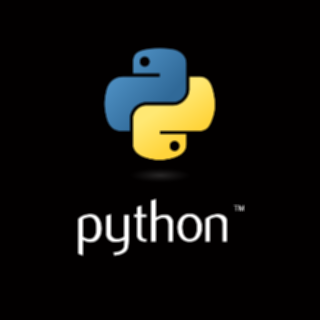

In [43]:
# criando o kernel
kernel_blur = np.ones((3, 3), np.float32) / 9

# aplicando o filtro
blurred = cv2.filter2D(reduced_image, -1, kernel_blur)

# mostranto a imagem com filtro
cv2_imshow(blurred)

Aqui, podemos ver o resultado do filtro, que foi utilizado para emba√ßar a imagem.

Tamb√©m podemos aumentar a "for√ßa" desse efeito, mudando o par√¢metro pelo qual a matriz √© dividida.

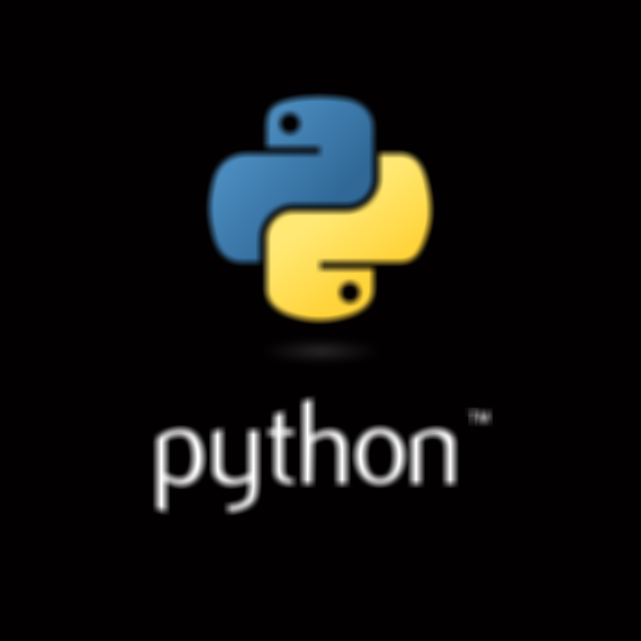

In [44]:
# criando o kernel
kernel_blur = np.ones((9,9), np.float32) / 81

# aplicando o filtro
blurred = cv2.filter2D(image, -1, kernel_blur)

# verificando o resultado
cv2_imshow(blurred)

#### Gaussian Blur

Outra forma de aplicar um *blur*, um emba√ßado na nossa imagem, seria o ***Gaussian Blur***. Esse filtro √© um pouco mais complexo, mas √© o tipo de kernel mais usado para processamento de imagens.

Para a cria√ß√£o desse filtro n√≥s usamos a **Fun√ß√£o Gaussiana**. Essa fun√ß√£o representa a probabilidade de eventos serem centrdos ao redor do valor da m√©dia. Al√©m disso, o desvio padr√£o (ùúé) dessa fun√ß√£o controla qu√£o ampla ser√° essa distribui√ß√£o. Ao tirar amostras de valores dessa fun√ß√£o, n√≥s consguirmos coeficientes para uma matriz de filtragem Gaussiana. O efeito de diferentes desvios padr√£o podem ser observados nas imagens a seguir.

<p align="center"><img src="http://media5.datahacker.rs/2020/05/image5.png" width="50%" ></p>
<center> Imagem 2D</center>

<p align="center"><img src="http://media5.datahacker.rs/2020/04/OIWce-768x576.png" width="50%" ></p>
<center> Imagem 3D</center>

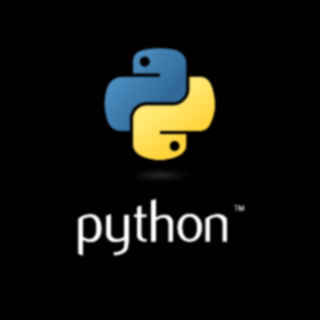

In [45]:
# utilizando o GaussianBlur, que j√° √© implementado no OpenCV
gaussian_blurred = cv2.GaussianBlur(reduced_image, (5, 5), 0)

#visualizando a imagem
cv2_imshow(gaussian_blurred)

#### Motion Blur

Da mesma forma que implementamos o blur acima, tamb√©m podemos implementar um outro tipo de emba√ßado, o *Motion Blur*.

O emba√ßado de movimento (*motion blur*), procura criar um efeito de movimento na imagem.

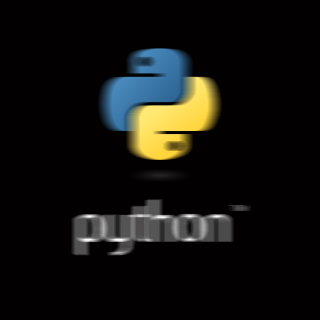

In [46]:
# implementando o filtro
kernel_motion_blur = np.zeros((15,15))
kernel_motion_blur[7, :] = np.ones(15)
kernel_motion_blur = kernel_motion_blur / 15

# aplicando o filtro
motion_blurred = cv2.filter2D(reduced_image, -1, kernel_motion_blur)

# plotando a imagem
cv2_imshow(motion_blurred)

#### Sharpening

O contr√°rio de emba√ßar a foto, seria deixar ela mais bem definida, "afiar" a imagem. E esse √© o conceito do *Sharpening*.

O objetivo do filtro de *sharpening* √© melhorar a nitidez, deixar a imagem menos emba√ßada, usado, normalmente, para melhorar os "limites" (*edges*) dentro da imagem. Existem muitas formas de criar filtros para melhorar as bordas dentro da imagem, uma delas √©:

<p align="center"><img src="http://media5.datahacker.rs/2020/04/25-279x300.jpg" width="30%" ></p>

O filtro de *sharpening* tem um centro positivo de 9 e todos os outros pontos possuem o valor -1.

Para esse tipo de filtro vamos usar a fun√ß√£o `cv2.filter2D()` que vai processar nossa imagem com um filtro criado por n√≥s, arbitrariamente. Esse filtro √© comumente usado para fazer sharpening em imagens coloridas.

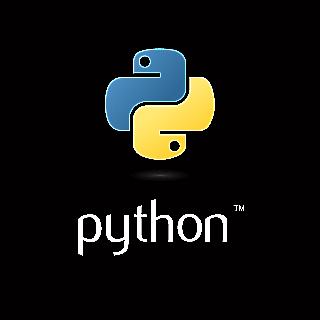

In [47]:
# criando o filtro de sharpening
kernel_sharpening_1 = np.array([[-1, -1, -1],
                                [-1, 9, -1],
                                [-1, -1, -1]])

# implementando o filtro
sharpened = cv2.filter2D(reduced_image, -1, kernel_sharpening_1)

# mostrando a imagem
cv2_imshow(sharpened)

#### Bitwise Operations

Utilizamos Opera√ß√µes Bitwise (a n√≠vel de bits) principalmente para aplicar m√°scaras a imagens.

- Bitwise `AND`: os pixels "brancos" da m√°scara s√£o substitu√≠dos pela imagem "de fundo"
- Bitwise `OR`: os pixels "pretos" da m√°scara s√£o substitu√≠dos pela imagem "de fundo" 

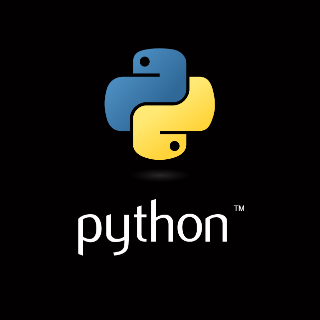

In [48]:
# imagem de fundo
cv2_imshow(reduced_image)

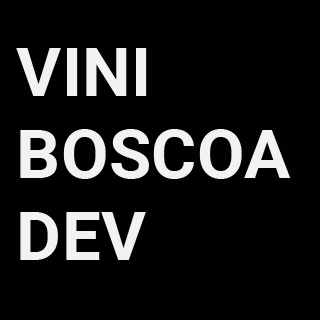

In [52]:
# mascara
mask = cv2.imread('/content/mask.png')
cv2_imshow(mask)

In [53]:
# mostrar dimens√µes das imagens
print('reduced_image:\t', reduced_image.shape)
print('mask:\t\t', mask.shape)

reduced_image:	 (320, 320, 3)
mask:		 (320, 320, 3)


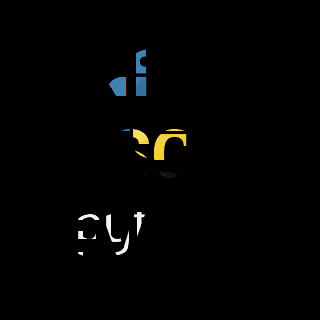

In [54]:
# bitwise AND
masked_and = cv2.bitwise_and(reduced_image, mask)
cv2_imshow(masked_and)

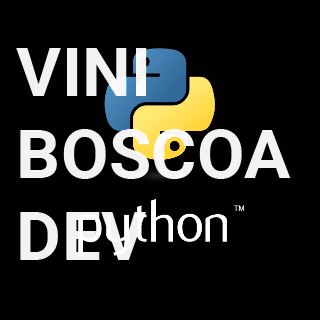

In [55]:
# bitwise OR
masked_or = cv2.bitwise_or(reduced_image, mask)
cv2_imshow(masked_or)

## Refer√™ncias

Baseado na master class de Vis√£o Computacional da Escola de Data Science (https://sigmoidal.ai)